# 1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

# 2.Import Dataset

In [3]:
forest=pd.read_csv('forestfires.csv')
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# Data Understanding

In [4]:
forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [5]:
forest.shape

(517, 31)

In [6]:
forest.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [57]:
forest.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
                 0
dtype: int64

In [58]:
forest.describe(include='all')

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,5.758221,2.736944,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,0.731141,0.731141
std,4.373275,1.925061,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796,0.443796
min,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,3.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,11.000000,4.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
forest.info

<bound method DataFrame.info of      month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  \
0        7    0  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...   
1       10    5  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...   
2       10    2  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...   
3        7    0  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...   
4        7    3  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...   
..     ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...   
512      1    3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...   
513      1    3  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...   
514      1    3  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...   
515      1    2  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...   
516      9    5  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0   

In [8]:
forest['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [35]:
# Checking for which value of area is categorised into large and small by creating crosstab between area and size_category
pd.crosstab(forest.area, forest.size_category)

size_category,0,1
area,,
0.00,0,247
0.09,0,1
0.17,0,1
0.21,0,1
0.24,0,1
...,...,...
200.94,1,0
212.88,1,0
278.53,1,0


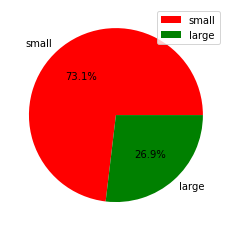

In [62]:
plt.pie(forest['size_category'].value_counts(),labels=['small','large'],autopct='%1.1f%%',colors=['r','g'])
plt.legend(['small','large'])
plt.show()

### We can see that data is imbalanced

# Correlation

In [13]:
corr_matrix=forest.corr()

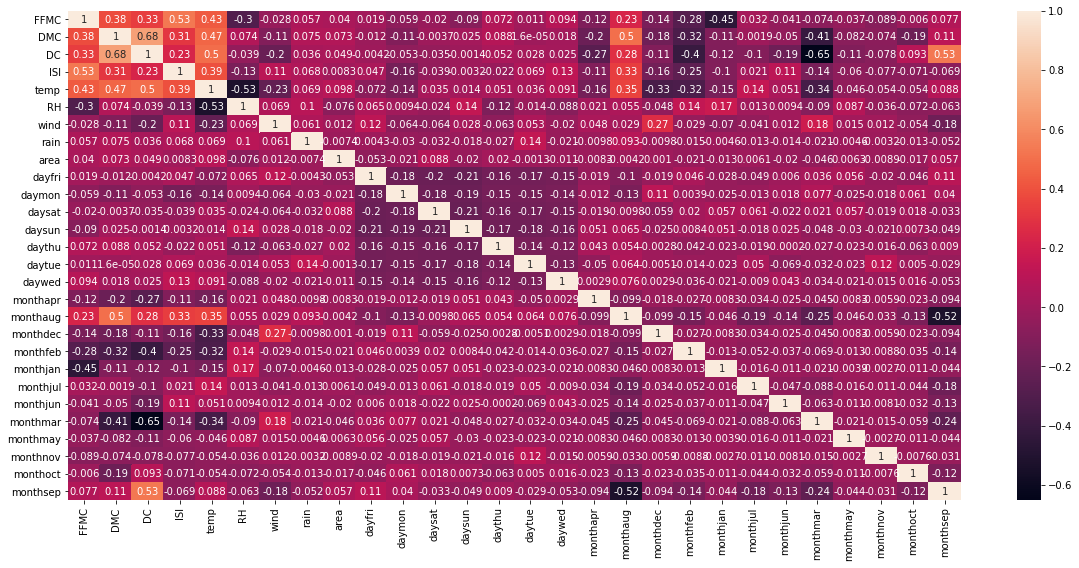

In [17]:
plt.figure(figsize=(20,9))
sns.heatmap(corr_matrix,annot=True)
plt.show()

# 4.Data Preprocessing

In [49]:
lb=LabelEncoder()
forest['month']=lb.fit_transform(forest['month'])
forest['day']=lb.fit_transform(forest['day'])
forest['size_category']=lb.fit_transform(forest['size_category'])
forest['size_category'].value_counts()

1    378
0    139
Name: size_category, dtype: int64

In [27]:
forest.dtypes

month              int64
day                int64
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category      int32
                   int32
dtype: object

## Feature Selection

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X=forest.drop('size_category',axis=1)
y=forest[['size_category']]

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=99,stratify=y)

In [31]:
from sklearn.feature_selection import mutual_info_classif
#mdetermine the mutual information
mutual_info=mutual_info_classif(X_train,y_train)
mutual_info

array([0.        , 0.01685438, 0.00309968, 0.        , 0.00503288,
       0.0074538 , 0.04582311, 0.02071729, 0.03201553, 0.01257467,
       0.57851784, 0.        , 0.01780725, 0.00494474, 0.02211617,
       0.02291056, 0.        , 0.03032792, 0.        , 0.        ,
       0.02984493, 0.        , 0.        , 0.        , 0.02273031,
       0.00714624, 0.        , 0.01412086, 0.02363749, 0.        ,
       0.58323939])

In [32]:
mutual_info_ser=pd.Series(mutual_info)
mutual_info_ser.index=X_train.columns
mutual_sort=mutual_info_ser.sort_values(ascending=False)

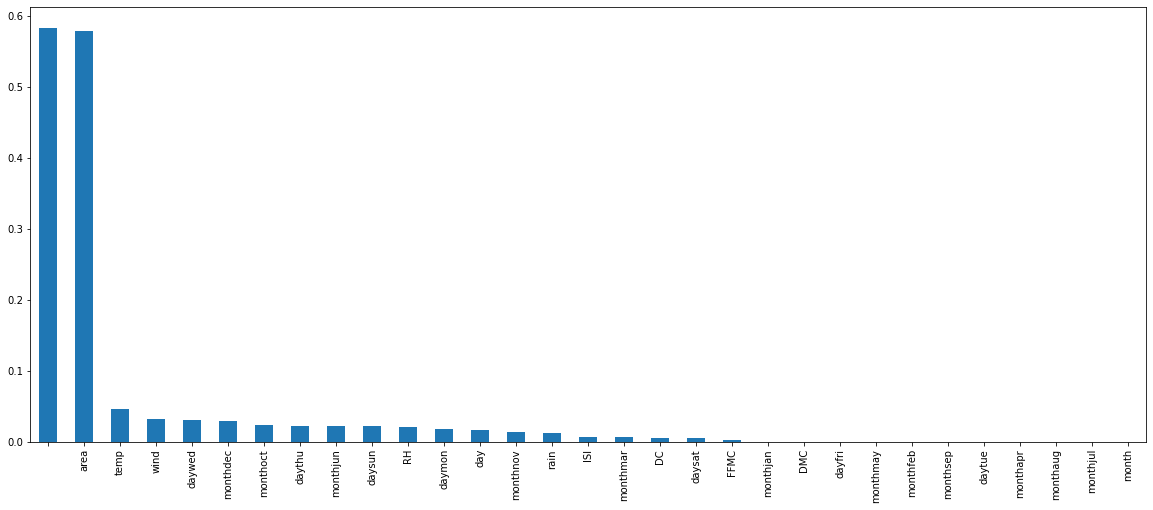

In [33]:
mutual_sort.plot.bar(figsize=(20,8))
plt.show()

In [34]:
from sklearn.feature_selection import SelectKBest

In [38]:
sel_top_11=SelectKBest(mutual_info_classif,k=11)
sel_top_11.fit(X_train,y_train)
X_train.columns[sel_top_11.get_support()]

Index(['temp', 'RH', 'wind', 'area', 'daywed', 'monthdec', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', ''],
      dtype='object')

In [40]:
X_train_transformed=sel_top_11.transform(X_train)
X_test_transformed=sel_top_11.transform(X_test)

In [42]:
X_train_transformed.shape,X_test_transformed.shape

((413, 11), (104, 11))

# Model Building

## kernel=rbf

In [51]:
model=SVC(class_weight={0:2,1:1})

# Model Training

In [52]:
model.fit(X_train_transformed,y_train)

SVC(class_weight={0: 2, 1: 1})

# Model Testing

#### Train data

In [53]:
y_pred_train_1=model.predict(X_train_transformed)

In [54]:
print(accuracy_score(y_train,y_pred_train_1))
print('====================================')
print(confusion_matrix(y_train,y_pred_train_1))
print('====================================')
print(classification_report(y_train,y_pred_train_1))

0.9975786924939467
[[110   1]
 [  0 302]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       111
           1       1.00      1.00      1.00       302

    accuracy                           1.00       413
   macro avg       1.00      1.00      1.00       413
weighted avg       1.00      1.00      1.00       413



#### Test data

In [55]:
y_pred_test_1=model.predict(X_test_transformed)

In [56]:
print(accuracy_score(y_test,y_pred_test_1))
print('====================================')
print(confusion_matrix(y_test,y_pred_test_1))
print('====================================')
print(classification_report(y_test,y_pred_test_1))

0.9903846153846154
[[27  1]
 [ 0 76]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.99      1.00      0.99        76

    accuracy                           0.99       104
   macro avg       0.99      0.98      0.99       104
weighted avg       0.99      0.99      0.99       104



# We can see that after selecting important features  and balancing data by tweaking hyper parameter class_weight .There is no overfitting or underfitting and we have got good accuracy